In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import statsmodels.api as sm

from patsy import dmatrices
from scipy.stats import norm
from matplotlib import pyplot as plt
from patsy.contrasts import Treatment
from statsmodels.formula.api import glm
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score

%matplotlib inline
sns.set_style('white')
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_stata('https://stats.idre.ucla.edu/stat/stata/dae/binary.dta')

In [3]:
dummies = pd.get_dummies(data['rank'])

In [4]:
df = pd.concat([data, dummies], axis = 1)
df.rename(columns = {1.0: 'rank1', 2.0: 'rank2', 3.0: 'rank3', 4.0: 'rank4'}, inplace = True)
df

,admit,gre,gpa,rank,rank1,rank2,rank3,rank4
0,0.0,380.0,3.61,3.0,0,0,1,0
1,1.0,660.0,3.67,3.0,0,0,1,0
2,1.0,800.0,4.00,1.0,1,0,0,0
3,1.0,640.0,3.19,4.0,0,0,0,1
4,0.0,520.0,2.93,4.0,0,0,0,1
...,...,...,...,...,...,...,...,...
395,0.0,620.0,4.00,2.0,0,1,0,0
396,0.0,560.0,3.04,3.0,0,0,1,0
397,0.0,460.0,2.63,2.0,0,1,0,0
398,0.0,700.0,3.65,2.0,0,1,0,0


In [5]:
pd.crosstab(df['admit'], df['rank'], margins = True)

rank,1.0,2.0,3.0,4.0,All
admit,,,,,
0.0,28,97,93,55,273
1.0,33,54,28,12,127
All,61,151,121,67,400


In [6]:
font = {'family' : 'Trebuchet MS',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

In [7]:
# You can use example: np.multiply(pratio, 1) to modify formula
logit_model = sm.Logit.from_formula('admit ~ gre + gpa + C(rank)', data = df)
logit_results = logit_model.fit()
logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                 0.08292
Time:                        02:25:44   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2.0]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3.0]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4.0]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gre                0.0023      0.001      2.070      0.038       0.000       0.004
gpa                0.8040      0.332      2.423      0.015       0.154       1.454
==================================================================================
"""

In [8]:
y, X = dmatrices('admit ~ gre + gpa + C(rank)', df, return_type = 'dataframe')

In [17]:
# sklearn output
model = LogisticRegression(penalty = 'none')
lr = model.fit(X, y)

In [28]:
lr.coef_

array([[-2.01479703, -0.76249679, -1.43983288, -1.63402356,  0.00211301,
         0.86461583]])

In [29]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [22]:
lr.predict_proba(X)

array([[0.82422249, 0.17577751],
       [0.71129925, 0.28870075],
       [0.2461459 , 0.7538541 ],
       [0.82537095, 0.17462905],
       [0.88406796, 0.11593204],
       [0.6439061 , 0.3560939 ],
       [0.56703282, 0.43296718],
       [0.78310808, 0.21689192],
       [0.80176394, 0.19823606],
       [0.4809323 , 0.5190677 ],
       [0.62591912, 0.37408088],
       [0.57830235, 0.42169765],
       [0.26216345, 0.73783655],
       [0.65700362, 0.34299638],
       [0.28741464, 0.71258536],
       [0.81470929, 0.18529071],
       [0.66137091, 0.33862909],
       [0.92381366, 0.07618634],
       [0.4649019 , 0.5350981 ],
       [0.39996386, 0.60003614],
       [0.84185447, 0.15814553],
       [0.56437841, 0.43562159],
       [0.87627268, 0.12372732],
       [0.81285191, 0.18714809],
       [0.57193321, 0.42806679],
       [0.30463869, 0.69536131],
       [0.40089604, 0.59910396],
       [0.79103758, 0.20896242],
       [0.58901207, 0.41098793],
       [0.52154781, 0.47845219],
       [0.

In [19]:
lr.predict(X)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

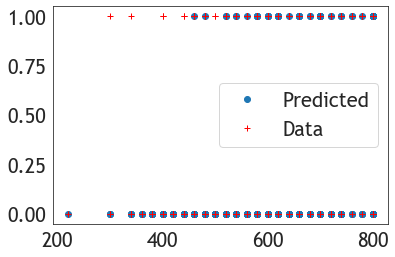

In [20]:
plt.plot(df['gre'], lr.predict(X), 'o', label = 'Predicted')
plt.plot(df['gre'], df['admit'], 'r+', label = 'Data')
plt.legend(loc = 'center right')
plt.show()